### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import datetime

### 2. Import the datasets

In [2]:
Transactions= pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name= "Transactions")
NewCustomerList= pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name= "NewCustomerList")
CustomerDemographic= pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name= "CustomerDemographic")
CustomerAddress= pd.read_excel("KPMG_VI_New_raw_data_update_final.xlsx", sheet_name= "CustomerAddress")

### 3. Explore and Clean Dataset

In [3]:
def cleanup_header(df):
    new_header= df.iloc[0]
    df = df[1:]
    df.columns= new_header
    return df

In [4]:
Transactions= cleanup_header(Transactions)
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


#### 4. Create a column for profit and frequency of purchase per customer

In [5]:
def fix_Trans(df):
    df["profit"]= df['list_price']- df["standard_cost"]
    df['Frequency']= df.customer_id.value_counts()
    
    return (df)

In [6]:
Transactions= fix_Trans(Transactions)
Transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,Frequency
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245,17.87,11.0
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701,1702.55,3.0
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361,1544.61,8.0
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145,817.36,2.0
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226,1055.82,6.0


#### 5. Keep only the columns you really need: In this case customer_id, transaction_date, profit, frequency

In [7]:
TransactionsNew= Transactions[["customer_id", "transaction_date", "profit", "Frequency"]]

In [8]:
def prepare_NewTrans(df):
    #TransactionsNew= df[["customer_id", "transaction_date", "profit", "Frequency"]]
    TransactionsNew['transaction_date'].max()

    import datetime as dt

    NOW = dt.datetime(2017,12,31)
    TransactionsNew['Date'] = pd.to_datetime(TransactionsNew['transaction_date'])
    TransactionsNew.drop(columns = ["transaction_date"], inplace= True)
    
    return (TransactionsNew)

In [9]:
#TransactionsNew.drop(columns = ["transaction_date"], inplace= True)
TransactionsNew= prepare_NewTrans(TransactionsNew)
TransactionsNew.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,customer_id,profit,Frequency,Date
1,2950,17.87,11.0,2017-02-25
2,3120,1702.55,3.0,2017-05-21
3,402,1544.61,8.0,2017-10-16
4,3135,817.36,2.0,2017-08-31
5,787,1055.82,6.0,2017-10-01


#### 6. Create a RFM Table

In [10]:
def rfm_table(df):
    import datetime as dt
    NOW = dt.datetime(2017,12,31)
    
    rfmTable = df.groupby('customer_id').agg({'Date': lambda x: (NOW - x.max()).days, 
                                                           'Frequency': lambda x: len(x), 
                                                           'profit': lambda x: x.sum()})
    rfmTable.rename(columns = {'Date': 'Recency', 'profit': 'MonetaryValue'}, inplace = True)

    return (rfmTable)

In [11]:
rfm_Table = rfm_table(TransactionsNew)
rfm_Table.head()

,Recency,Frequency,MonetaryValue
customer_id,,,
1,8,11.0,3018.09
2,129,3.0,2226.26
3,103,8.0,3362.81
4,196,2.0,220.57
5,17,6.0,2394.94


In [12]:
Transactions[Transactions["customer_id"] == 1]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,Frequency
94,94,86,1,2017-12-23 00:00:00,False,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482,110.56,7.0
3765,3765,38,1,2017-04-06 00:00:00,True,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526,751.02,NaN
5157,5157,47,1,2017-05-11 00:00:00,True,Approved,Trek Bicycles,Road,low,small,1720.7,1531.42,37823,189.28,NaN
9785,9785,72,1,2017-01-05 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,360.4,270.3,37873,90.1,NaN
13424,13424,2,1,2017-02-21 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,38573,17.87,NaN
13644,13644,25,1,2017-05-19 00:00:00,False,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,33552,709.34,NaN
14486,14486,23,1,2017-03-27 00:00:00,False,Approved,Norco Bicycles,Mountain,low,small,688.63,612.88,33455,75.75,NaN
14931,14931,31,1,2017-12-14 00:00:00,True,Approved,Giant Bicycles,Standard,medium,medium,230.91,173.18,37337,57.73,NaN
15663,15663,32,1,2017-06-04 00:00:00,True,Approved,Giant Bicycles,Standard,medium,medium,642.7,211.37,40618,431.33,NaN
16423,16423,9,1,2017-12-09 00:00:00,True,Approved,OHM Cycles,Road,medium,medium,742.54,667.4,37838,75.14,NaN


#### 7. Create a Score for each client

In [13]:
# x = "Recency"
# d[p]= quantiles
# Define two seperate functions

quantiles = rfm_Table.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [14]:
def rfm_quartiles(df):
    df['r_quartile'] = df['Recency'].apply(RScore, args=('Recency',quantiles,))
    df['f_quartile'] = df['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
    df['m_quartile'] = df['MonetaryValue'].apply(FMScore, args=('MonetaryValue',quantiles,))

    df['RFMScore'] = df.r_quartile.map(str) + df.f_quartile.map(str) + df.m_quartile.map(str)
    return (df)

In [15]:
rfmTable= rfm_quartiles(rfm_Table)

In [16]:
rfmTable.head()

,Recency,Frequency,MonetaryValue,r_quartile,f_quartile,m_quartile,RFMScore
customer_id,,,,,,,
1,8,11.0,3018.09,1,1,2,112
2,129,3.0,2226.26,4,4,3,443
3,103,8.0,3362.81,4,1,2,412
4,196,2.0,220.57,4,4,4,444
5,17,6.0,2394.94,1,3,3,133


#### 8. Checking who are our number 1 customers based on Recency

In [17]:
rfmTable[rfmTable['RFMScore']=='111'].sort_values('Recency', ascending=True).head(10)

,Recency,Frequency,MonetaryValue,r_quartile,f_quartile,m_quartile,RFMScore
customer_id,,,,,,,
3433,1,10.0,5925.74,1,1,1,111
934,1,8.0,4899.60,1,1,1,111
2165,1,10.0,6052.93,1,1,1,111
1506,1,10.0,6435.10,1,1,1,111
151,1,8.0,5665.41,1,1,1,111
2055,1,9.0,5563.63,1,1,1,111
2434,1,9.0,6874.53,1,1,1,111
2659,1,12.0,8143.93,1,1,1,111
1000,1,9.0,5383.48,1,1,1,111


#### 9. Merging the RFM Table with our Customer Demographics

In [18]:
Customer_Demographic= cleanup_header(CustomerDemographic)
Customer_Address = cleanup_header(CustomerAddress)
Customer_Demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8


In [19]:
def merge_customers(Customer_Demographic, Customer_Address):
    Customer_Demographic.set_index("customer_id", inplace=True)
    Customer_Address.set_index("customer_id", inplace=True)
    return Customer_Demographic.join(Customer_Address, on="customer_id")

In [20]:
Customers = merge_customers(Customer_Demographic, Customer_Address)
Customers.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,address,postcode,state,country,property_valuation
customer_id,,,,,,,,,,,,,,,,,
1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11,060 Morning Avenue,2016,New South Wales,Australia,10
2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15,NaN,NaN,NaN,NaN,NaN
4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7,0 Holy Cross Court,4211,QLD,Australia,9
5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8,17979 Del Mar Point,2448,New South Wales,Australia,4


In [21]:
CustomersRFM= Customers.join(rfmTable, on="customer_id")

In [22]:
CustomersRFM.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,...,state,country,property_valuation,Recency,Frequency,MonetaryValue,r_quartile,f_quartile,m_quartile,RFMScore
customer_id,,,,,,,,,,,,,,,,,,,,,
1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",...,New South Wales,Australia,10,8.0,11.0,3018.09,1.0,1.0,2.0,112
2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,...,New South Wales,Australia,10,129.0,3.0,2226.26,4.0,4.0,3.0,443
3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,...,NaN,NaN,NaN,103.0,8.0,3362.81,4.0,1.0,2.0,412
4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,...,QLD,Australia,9,196.0,2.0,220.57,4.0,4.0,4.0,444
5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,...,New South Wales,Australia,4,17.0,6.0,2394.94,1.0,3.0,3.0,133


In [23]:
def cleanup_customer(df):
    df.drop(columns=["first_name", "last_name", "job_title", 
                     "deceased_indicator", "address", "postcode", "country"], inplace=True)
    # Gender
    genderDict = {"F": "Female", "M": "Male", "Femal": "Female", "U": "Undefined"}
    df['gender'].replace(genderDict, inplace= True)
    
    # DOB
    now = datetime.datetime.now()
    df['age']= now.year - pd.DatetimeIndex(df['DOB']).year
    df.drop(columns=["DOB"], inplace=True)
    
    # Job industry category
    df["job_industry_category"].fillna("n/a", inplace=True)
     
    # tenure
    df["tenure"].fillna(df["tenure"].mean(), inplace=True)
    
    # state
    stateDict = {"New South Wales": "NSW", "Victoria": "VIC", "Queensland": "QLD"}
    df['state'].replace(stateDict, inplace= True)
    df["state"].fillna("n/a", inplace=True)
    
    # property valuation
    df["property_valuation"] = df["property_valuation"].astype("float64")
    df["property_valuation"].fillna(df["property_valuation"].mean(), inplace=True)
    
    # age
    df["age"].fillna(df["age"].mean(), inplace=True)
    
    # Or rename the existing DataFrame (rather than creating a copy) 
    df.rename(columns={'past_3_years_bike_related_purchases': '3y_bike'}, inplace=True)
    df["3y_bike"] = df["3y_bike"].astype("float64")
    
    df.drop(columns = ['default'], inplace = True)
    
    return (df)

In [25]:
#CustomersRFM = cleanup_customer(CustomersRFM)
CustomersRFM.to_csv("CustomersRFM.csv")

# x= CustomerWithRMF["3y_bike"]
# y = CustomerWithRMF["RFMScore"]

###  Grouping to find out some trends

In [111]:
#Recency = CustomersRFM[CustomersRFM['RFMScore']=='111'].sort_values('Recency', ascending=True).head(100)
Recency.groupby("3y_bike").MonetaryValue.value_counts()

3y_bike  MonetaryValue
0.0      6433.75          1
1.0      5020.67          1
2.0      4809.95          1
5.0      4841.71          1
         5580.57          1
                         ..
97.0     4557.65          1
         4778.33          1
         6692.39          1
98.0     4790.82          1
99.0     4534.24          1
Name: MonetaryValue, Length: 100, dtype: int64

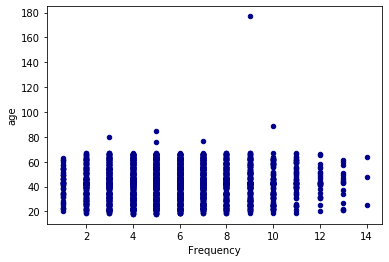

In [140]:
import matplotlib.pyplot as plt

ax1 = CustomersRFM.plot.scatter(x='Frequency',
                      y='age',
                      c='DarkBlue')

In [135]:
## Conclusion: Mass Customers purchase more often
## Company can aim at driving more monetary value by aiming at customers in NSW as they tend to spend slightly more than
#than other states
##Companies can drive more frequent purchases by aiming at 

In [ ]:
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

In [154]:
def col_category_to_idx(df, col):   
    l = df[col].unique()
    d = {k: v for v, k in enumerate(l)}
    df[col].replace(d, inplace= True)

In [159]:
def cleanup_customer(df):
    df.drop(columns=["first_name", "last_name", "job_title", 
                     "deceased_indicator", "address", "postcode", "country"], inplace=True)
    # Gender
    genderDict = {"F": "Female", "M": "Male", "Femal": "Female", "U": "Undefined"}
    df['gender'].replace(genderDict, inplace= True)
    col_category_to_idx(df, "gender")
    
    # DOB
    now = datetime.datetime.now()
    df['age']= now.year - pd.DatetimeIndex(df['DOB']).year
    df.drop(columns=["DOB"], inplace=True)
    
    # Job industry category
    df["job_industry_category"].fillna("n/a", inplace=True)
    col_category_to_idx(df, "job_industry_category")
    
    col_category_to_idx(df, "wealth_segment")
    col_category_to_idx(df, "owns_car")  
    
    # tenure
    df["tenure"].fillna(df["tenure"].mean(), inplace=True)
    
    # state
    stateDict = {"New South Wales": "NSW", "Victoria": "VIC", "Queensland": "QLD"}
    df['state'].replace(stateDict, inplace= True)
    df["state"].fillna("n/a", inplace=True)
    col_category_to_idx(df, "state")  
    
    # property valuation
    df["property_valuation"] = df["property_valuation"].astype("float64")
    df["property_valuation"].fillna(df["property_valuation"].mean(), inplace=True)
    
    # age
    df["age"].fillna(df["age"].mean(), inplace=True)
    
    # Or rename the existing DataFrame (rather than creating a copy) 
    df.rename(columns={'past_3_years_bike_related_purchases': '3y_bike'}, inplace=True)
    df["3y_bike"] = df["3y_bike"].astype("float64")
    
    df.drop(columns = ['default'], inplace = True)
    
    return (df)

In [253]:
#RfmInclusive.drop(columns =["default"], inplace = True)
#Rfmtest.drop(columns = ["default"], inplace = True)
Rfmtest['RFMScore']= Rfmtest['RFMScore'].astype('float64')

gender                     int64
3y_bike                  float64
job_industry_category      int64
wealth_segment             int64
owns_car                   int64
tenure                   float64
state                      int64
property_valuation       float64
Recency                  float64
Frequency                float64
MonetaryValue            float64
r_quartile               float64
f_quartile               float64
m_quartile               float64
RFMScore                 float64
age                      float64
dtype: object

In [168]:
def customer_features(df):
    # expand category data to one-hot vectors
    return pd.get_dummies(df, columns=["gender", "job_industry_category", 
                                       "wealth_segment", "owns_car", "state"])

In [256]:
#RfmCustomers= customer_features(Rfmtest)
RfmCustomers= RfmCustomers.dropna(how= 'any')

In [258]:
RfmCustomers= RfmCustomers[[c for c in RfmCustomers if c not in ['RFMScore']] 
       + ['RFMScore']]

In [211]:
#Rfmtest1.dropna(how= 'any', inplace= True)

In [263]:
# x = Dropped.drop(columns = ['RFMScore', 'Recency', 'Frequency', 'MonetaryValue']).to_numpy()
# print(x.shape)
# print (y.shape)
RfmCustomers= RfmCustomers.to_numpy()

In [264]:
def to_inputs_outputs(data):
    x = np.delete(data, -1, axis=1)
    y = data[:, -1].reshape((-1, 1))
    return (x, y)

In [265]:
to_inputs_outputs(RfmCustomers)

(array([[93.        , 11.        , 10.        , ...,  0.        ,
          0.        ,  0.        ],
        [81.        , 16.        , 10.        , ...,  0.        ,
          0.        ,  0.        ],
        [61.        , 15.        ,  7.51401401, ...,  1.        ,
          0.        ,  0.        ],
        ...,
        [28.        ,  5.        ,  4.        , ...,  0.        ,
          0.        ,  1.        ],
        [29.        ,  7.        ,  9.        , ...,  0.        ,
          1.        ,  0.        ],
        [71.        , 17.        , 10.        , ...,  0.        ,
          0.        ,  0.        ]]),
 array([[112.],
        [443.],
        [412.],
        ...,
        [432.],
        [321.],
        [434.]]))

In [267]:
data = RfmCustomers
data_train, data_dev, data_test = np.split(data, [int(0.8 * len(data)), int(0.95*len(data))])

X_train, Y_train = to_inputs_outputs(data_train)
X_dev, Y_dev = to_inputs_outputs(data_dev)
X_test, Y_test = to_inputs_outputs(data_test)

print("X_train", X_train.shape)
print("Y_train", Y_train.shape)
print("X_dev", X_dev.shape)
print("Y_dev", Y_dev.shape)
print("X_test", X_test.shape)
print("Y_test", Y_test.shape)

X_train (2794, 32)
Y_train (2794, 1)
X_dev (524, 32)
Y_dev (524, 1)
X_test (175, 32)
Y_test (175, 1)


In [268]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
 
model = Sequential()
model.add(Dense(1, activation='linear', input_shape=(32,)))
model.compile(optimizer=optimizers.RMSprop(lr=0.1), loss='mean_squared_error', metrics=['mae'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 33        
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [269]:
model.fit(X_train,Y_train,epochs=2000,batch_size=32,verbose=1,validation_data=(X_dev, Y_dev))

Epoch 1/2000
88/88 [==============================] - 0s 5ms/step - loss: 52830.2578 - mae: 166.4318 - val_loss: 10675.9795 - val_mae: 87.6213
Epoch 2/2000
88/88 [==============================] - 0s 2ms/step - loss: 38782.9844 - mae: 140.8876 - val_loss: 5554.8306 - val_mae: 56.5545
Epoch 3/2000
88/88 [==============================] - 0s 2ms/step - loss: 36631.2812 - mae: 140.3757 - val_loss: 98416.8516 - val_mae: 282.1941
Epoch 4/2000
88/88 [==============================] - 0s 2ms/step - loss: 38996.0898 - mae: 139.0214 - val_loss: 5271.2773 - val_mae: 57.4702
Epoch 5/2000
88/88 [==============================] - 0s 2ms/step - loss: 37398.6211 - mae: 141.5672 - val_loss: 36846.7500 - val_mae: 172.9465
Epoch 6/2000
88/88 [==============================] - 0s 2ms/step - loss: 38737.0586 - mae: 151.0594 - val_loss: 8864.7490 - val_mae: 77.9031
Epoch 7/2000
88/88 [==============================] - 0s 2ms/step - loss: 36812.7734 - mae: 122.6520 - val_loss: 103925.0781 - val_mae: 287.247

Epoch 58/2000
88/88 [==============================] - 0s 2ms/step - loss: 31356.3242 - mae: 119.4984 - val_loss: 106457.9531 - val_mae: 288.1605
Epoch 59/2000
88/88 [==============================] - 0s 2ms/step - loss: 36269.2109 - mae: 132.2088 - val_loss: 6412.9937 - val_mae: 65.7219
Epoch 60/2000
88/88 [==============================] - 0s 2ms/step - loss: 36023.5352 - mae: 125.0192 - val_loss: 2440.4236 - val_mae: 38.4903
Epoch 61/2000
88/88 [==============================] - 0s 2ms/step - loss: 36170.9219 - mae: 143.1261 - val_loss: 1794.5992 - val_mae: 34.7228
Epoch 62/2000
88/88 [==============================] - 0s 2ms/step - loss: 36459.2930 - mae: 138.3017 - val_loss: 55932.0312 - val_mae: 205.1007
Epoch 63/2000
88/88 [==============================] - 0s 2ms/step - loss: 34655.3711 - mae: 141.9797 - val_loss: 2280.8867 - val_mae: 38.7445
Epoch 64/2000
88/88 [==============================] - 0s 2ms/step - loss: 35027.3086 - mae: 135.0594 - val_loss: 5331.7988 - val_mae: 59

88/88 [==============================] - 0s 2ms/step - loss: 33959.7070 - mae: 121.8885 - val_loss: 378.2859 - val_mae: 15.0011
Epoch 171/2000
88/88 [==============================] - 0s 1ms/step - loss: 35986.4531 - mae: 124.9076 - val_loss: 5540.7129 - val_mae: 65.5700
Epoch 172/2000
88/88 [==============================] - 0s 1ms/step - loss: 36705.7266 - mae: 142.0708 - val_loss: 12848.4961 - val_mae: 99.3089
Epoch 173/2000
88/88 [==============================] - 0s 2ms/step - loss: 31334.8770 - mae: 116.6671 - val_loss: 66366.1875 - val_mae: 223.9482
Epoch 174/2000
88/88 [==============================] - 0s 2ms/step - loss: 33149.5742 - mae: 107.3535 - val_loss: 345.8812 - val_mae: 12.8554
Epoch 175/2000
88/88 [==============================] - 0s 1ms/step - loss: 35098.5156 - mae: 104.0593 - val_loss: 1224.6183 - val_mae: 29.2876
Epoch 176/2000
88/88 [==============================] - 0s 1ms/step - loss: 31323.5938 - mae: 110.6975 - val_loss: 2348.9141 - val_mae: 42.2118
Epoch 

Epoch 227/2000
88/88 [==============================] - 0s 2ms/step - loss: 36879.2109 - mae: 128.9930 - val_loss: 188.9035 - val_mae: 11.5128
Epoch 228/2000
88/88 [==============================] - 0s 2ms/step - loss: 30485.1602 - mae: 83.0997 - val_loss: 33026.6133 - val_mae: 160.5113
Epoch 229/2000
88/88 [==============================] - 0s 2ms/step - loss: 33893.8711 - mae: 112.2977 - val_loss: 736.6339 - val_mae: 22.1909
Epoch 230/2000
88/88 [==============================] - 0s 2ms/step - loss: 35685.6445 - mae: 117.6268 - val_loss: 5408.0771 - val_mae: 67.5102
Epoch 231/2000
88/88 [==============================] - 0s 2ms/step - loss: 33630.8164 - mae: 100.6308 - val_loss: 197.5607 - val_mae: 11.6606
Epoch 232/2000
88/88 [==============================] - 0s 2ms/step - loss: 31010.9512 - mae: 98.5769 - val_loss: 249936.5469 - val_mae: 437.0990
Epoch 233/2000
88/88 [==============================] - 0s 2ms/step - loss: 34606.7383 - mae: 136.5598 - val_loss: 12617.7139 - val_mae:

Epoch 340/2000
88/88 [==============================] - 0s 2ms/step - loss: 30998.2246 - mae: 96.7008 - val_loss: 2293.0955 - val_mae: 43.3059
Epoch 341/2000
88/88 [==============================] - 0s 2ms/step - loss: 32387.1992 - mae: 96.7003 - val_loss: 5657.4585 - val_mae: 66.1838
Epoch 342/2000
88/88 [==============================] - 0s 2ms/step - loss: 37049.3242 - mae: 139.2093 - val_loss: 67425.8125 - val_mae: 228.6803
Epoch 343/2000
88/88 [==============================] - 0s 2ms/step - loss: 33683.4258 - mae: 115.7798 - val_loss: 314.6563 - val_mae: 15.7881
Epoch 344/2000
88/88 [==============================] - 0s 2ms/step - loss: 35562.4453 - mae: 106.9950 - val_loss: 22498.6543 - val_mae: 134.1812
Epoch 345/2000
88/88 [==============================] - 0s 2ms/step - loss: 32179.4121 - mae: 131.2094 - val_loss: 9947.6904 - val_mae: 90.4575
Epoch 346/2000
88/88 [==============================] - 0s 2ms/step - loss: 30040.2773 - mae: 94.3732 - val_loss: 202.3022 - val_mae: 1

Epoch 397/2000
88/88 [==============================] - 0s 2ms/step - loss: 33645.1523 - mae: 108.3995 - val_loss: 153.2095 - val_mae: 10.6437
Epoch 398/2000
88/88 [==============================] - 0s 2ms/step - loss: 31296.0566 - mae: 96.0928 - val_loss: 1490.2045 - val_mae: 33.5919
Epoch 399/2000
88/88 [==============================] - 0s 2ms/step - loss: 35598.7617 - mae: 125.5717 - val_loss: 106386.2031 - val_mae: 284.0642
Epoch 400/2000
88/88 [==============================] - 0s 3ms/step - loss: 32447.4531 - mae: 123.0837 - val_loss: 192.4348 - val_mae: 11.9399
Epoch 401/2000
88/88 [==============================] - 0s 2ms/step - loss: 31640.4980 - mae: 91.0589 - val_loss: 229391.6719 - val_mae: 422.9708
Epoch 402/2000
88/88 [==============================] - 0s 2ms/step - loss: 29924.8555 - mae: 106.4515 - val_loss: 10950.7881 - val_mae: 94.5892
Epoch 403/2000
88/88 [==============================] - 0s 1ms/step - loss: 36028.0508 - mae: 122.2729 - val_loss: 131518.8750 - val_

Epoch 510/2000
88/88 [==============================] - 0s 1ms/step - loss: 30997.3965 - mae: 114.8253 - val_loss: 41644.3281 - val_mae: 180.7341
Epoch 511/2000
88/88 [==============================] - 0s 1ms/step - loss: 36132.4727 - mae: 132.8037 - val_loss: 977.8302 - val_mae: 25.6262
Epoch 512/2000
88/88 [==============================] - 0s 2ms/step - loss: 30110.0840 - mae: 112.5477 - val_loss: 57558.2539 - val_mae: 210.0626
Epoch 513/2000
88/88 [==============================] - 0s 2ms/step - loss: 38700.5703 - mae: 133.2520 - val_loss: 963.7401 - val_mae: 25.6151
Epoch 514/2000
88/88 [==============================] - 0s 1ms/step - loss: 29472.5605 - mae: 114.3344 - val_loss: 20984.9590 - val_mae: 128.5379
Epoch 515/2000
88/88 [==============================] - 0s 2ms/step - loss: 36219.8945 - mae: 125.9515 - val_loss: 71.1998 - val_mae: 6.8776
Epoch 516/2000
88/88 [==============================] - 0s 1ms/step - loss: 32954.8867 - mae: 123.4748 - val_loss: 4532.4590 - val_mae:

Epoch 567/2000
88/88 [==============================] - 0s 1ms/step - loss: 34563.5938 - mae: 98.4936 - val_loss: 1017.7060 - val_mae: 26.9248
Epoch 568/2000
88/88 [==============================] - 0s 1ms/step - loss: 33238.6445 - mae: 116.8661 - val_loss: 92.0986 - val_mae: 7.2954
Epoch 569/2000
88/88 [==============================] - 0s 3ms/step - loss: 30530.6094 - mae: 98.4762 - val_loss: 76011.1562 - val_mae: 241.6414
Epoch 570/2000
88/88 [==============================] - 0s 2ms/step - loss: 33262.5898 - mae: 121.1939 - val_loss: 121978.3203 - val_mae: 306.5895
Epoch 571/2000
88/88 [==============================] - 0s 2ms/step - loss: 34342.3555 - mae: 127.5769 - val_loss: 46.4594 - val_mae: 5.5905
Epoch 572/2000
88/88 [==============================] - 0s 2ms/step - loss: 33190.8594 - mae: 127.8145 - val_loss: 33696.6797 - val_mae: 164.3809
Epoch 573/2000
88/88 [==============================] - 0s 2ms/step - loss: 34598.4023 - mae: 131.0606 - val_loss: 4451.2593 - val_mae: 5

Epoch 624/2000
88/88 [==============================] - 0s 2ms/step - loss: 33478.7070 - mae: 132.6668 - val_loss: 1911.1743 - val_mae: 35.5245
Epoch 625/2000
88/88 [==============================] - 0s 1ms/step - loss: 33107.6914 - mae: 103.5767 - val_loss: 11862.8730 - val_mae: 96.7513
Epoch 626/2000
88/88 [==============================] - 0s 3ms/step - loss: 29655.5469 - mae: 97.7890 - val_loss: 1804.0178 - val_mae: 39.6813
Epoch 627/2000
88/88 [==============================] - 0s 3ms/step - loss: 36550.2656 - mae: 101.0552 - val_loss: 705.9545 - val_mae: 23.6188
Epoch 628/2000
88/88 [==============================] - 0s 2ms/step - loss: 33001.0234 - mae: 128.3592 - val_loss: 36741.6016 - val_mae: 169.3012
Epoch 629/2000
88/88 [==============================] - 0s 2ms/step - loss: 34505.6641 - mae: 122.2021 - val_loss: 8136.2852 - val_mae: 81.4789
Epoch 630/2000
88/88 [==============================] - 0s 1ms/step - loss: 30970.1797 - mae: 97.8062 - val_loss: 76088.5781 - val_mae:

Epoch 737/2000
88/88 [==============================] - 0s 2ms/step - loss: 31683.4102 - mae: 91.9661 - val_loss: 908.8346 - val_mae: 24.6673
Epoch 738/2000
88/88 [==============================] - 0s 1ms/step - loss: 30567.6738 - mae: 111.2494 - val_loss: 87374.9922 - val_mae: 257.7208
Epoch 739/2000
88/88 [==============================] - 0s 1ms/step - loss: 34483.6680 - mae: 119.7778 - val_loss: 152357.3906 - val_mae: 345.4838
Epoch 740/2000
88/88 [==============================] - 0s 1ms/step - loss: 33332.3359 - mae: 90.9184 - val_loss: 92386.3828 - val_mae: 269.4095
Epoch 741/2000
88/88 [==============================] - 0s 1ms/step - loss: 31246.9297 - mae: 96.9824 - val_loss: 54.1713 - val_mae: 6.7633
Epoch 742/2000
88/88 [==============================] - 0s 1ms/step - loss: 32760.4629 - mae: 110.0939 - val_loss: 3711.1787 - val_mae: 52.7138
Epoch 743/2000
88/88 [==============================] - 0s 2ms/step - loss: 32599.0234 - mae: 109.0527 - val_loss: 233186.7031 - val_mae

Epoch 850/2000
88/88 [==============================] - 0s 1ms/step - loss: 29612.3379 - mae: 111.3730 - val_loss: 158716.4531 - val_mae: 351.9675
Epoch 851/2000
88/88 [==============================] - 0s 1ms/step - loss: 36834.8203 - mae: 129.2168 - val_loss: 312.9290 - val_mae: 14.6062
Epoch 852/2000
88/88 [==============================] - 0s 2ms/step - loss: 33372.4648 - mae: 103.9939 - val_loss: 32.3708 - val_mae: 4.5430
Epoch 853/2000
88/88 [==============================] - 0s 1ms/step - loss: 31037.6582 - mae: 77.7953 - val_loss: 189.2951 - val_mae: 12.3293
Epoch 854/2000
88/88 [==============================] - 0s 1ms/step - loss: 32722.0234 - mae: 106.5350 - val_loss: 211.4913 - val_mae: 13.0682
Epoch 855/2000
88/88 [==============================] - 0s 1ms/step - loss: 33643.5430 - mae: 123.4281 - val_loss: 50125.4258 - val_mae: 198.2230
Epoch 856/2000
88/88 [==============================] - 0s 2ms/step - loss: 32173.1504 - mae: 107.3334 - val_loss: 14636.2754 - val_mae: 1

Epoch 907/2000
88/88 [==============================] - 0s 2ms/step - loss: 32322.2070 - mae: 143.2634 - val_loss: 198126.1719 - val_mae: 394.7960
Epoch 908/2000
88/88 [==============================] - 0s 3ms/step - loss: 33337.0039 - mae: 117.8153 - val_loss: 1521.8196 - val_mae: 36.9288
Epoch 909/2000
88/88 [==============================] - 0s 2ms/step - loss: 32911.8555 - mae: 110.5883 - val_loss: 302369.9375 - val_mae: 481.5585
Epoch 910/2000
88/88 [==============================] - 0s 2ms/step - loss: 35528.7148 - mae: 109.2160 - val_loss: 586.0320 - val_mae: 20.1833
Epoch 911/2000
88/88 [==============================] - 0s 2ms/step - loss: 34110.6367 - mae: 116.6102 - val_loss: 9136.3877 - val_mae: 79.5383
Epoch 912/2000
88/88 [==============================] - 0s 2ms/step - loss: 30819.5879 - mae: 115.3051 - val_loss: 680.1718 - val_mae: 23.3640
Epoch 913/2000
88/88 [==============================] - 0s 2ms/step - loss: 34289.1133 - mae: 110.9730 - val_loss: 13698.3252 - val_

Epoch 964/2000
88/88 [==============================] - 0s 2ms/step - loss: 36890.7500 - mae: 137.3863 - val_loss: 27149.3379 - val_mae: 145.3115
Epoch 965/2000
88/88 [==============================] - 0s 3ms/step - loss: 31456.2109 - mae: 135.9727 - val_loss: 215714.7969 - val_mae: 408.4410
Epoch 966/2000
88/88 [==============================] - 0s 2ms/step - loss: 32773.1211 - mae: 129.6873 - val_loss: 15870.2324 - val_mae: 112.4770
Epoch 967/2000
88/88 [==============================] - 0s 1ms/step - loss: 34114.3633 - mae: 119.6493 - val_loss: 27.6229 - val_mae: 4.3845
Epoch 968/2000
88/88 [==============================] - 0s 3ms/step - loss: 35990.4922 - mae: 101.6132 - val_loss: 730.7966 - val_mae: 23.0030
Epoch 969/2000
88/88 [==============================] - 0s 2ms/step - loss: 30629.5527 - mae: 119.9642 - val_loss: 61286.6211 - val_mae: 219.9173
Epoch 970/2000
88/88 [==============================] - 0s 1ms/step - loss: 31635.8535 - mae: 110.9975 - val_loss: 309.8161 - val_m

88/88 [==============================] - 0s 2ms/step - loss: 32765.7949 - mae: 123.4049 - val_loss: 142225.0000 - val_mae: 332.6855
Epoch 1077/2000
88/88 [==============================] - 0s 1ms/step - loss: 30838.9551 - mae: 99.3485 - val_loss: 15742.7969 - val_mae: 112.0885
Epoch 1078/2000
88/88 [==============================] - 0s 2ms/step - loss: 32975.3711 - mae: 114.1339 - val_loss: 156559.9688 - val_mae: 349.9050
Epoch 1079/2000
88/88 [==============================] - 0s 2ms/step - loss: 34657.6562 - mae: 133.2871 - val_loss: 7389.9995 - val_mae: 75.6478
Epoch 1080/2000
88/88 [==============================] - 0s 1ms/step - loss: 34716.8633 - mae: 113.6737 - val_loss: 198.4160 - val_mae: 12.6340
Epoch 1081/2000
88/88 [==============================] - 0s 1ms/step - loss: 34917.0078 - mae: 137.0876 - val_loss: 30072.2305 - val_mae: 152.0160
Epoch 1082/2000
88/88 [==============================] - 0s 1ms/step - loss: 30998.3477 - mae: 124.2604 - val_loss: 33492.7461 - val_mae: 

88/88 [==============================] - 0s 1ms/step - loss: 33910.7812 - mae: 124.2590 - val_loss: 34869.3008 - val_mae: 163.4205
Epoch 1189/2000
88/88 [==============================] - 0s 2ms/step - loss: 32459.3594 - mae: 127.8367 - val_loss: 25514.3770 - val_mae: 140.1461
Epoch 1190/2000
88/88 [==============================] - 0s 2ms/step - loss: 34297.0977 - mae: 131.7952 - val_loss: 126758.1562 - val_mae: 314.1765
Epoch 1191/2000
88/88 [==============================] - 0s 2ms/step - loss: 33361.1719 - mae: 133.3392 - val_loss: 65063.2148 - val_mae: 223.7568
Epoch 1192/2000
88/88 [==============================] - 0s 2ms/step - loss: 37004.6289 - mae: 117.7198 - val_loss: 83.7829 - val_mae: 7.7841
Epoch 1193/2000
88/88 [==============================] - 0s 3ms/step - loss: 29060.3242 - mae: 90.1111 - val_loss: 112.3173 - val_mae: 8.6836
Epoch 1194/2000
88/88 [==============================] - 0s 2ms/step - loss: 31563.1836 - mae: 95.6427 - val_loss: 131516.5938 - val_mae: 317.5

KeyboardInterrupt: 

In [274]:
RfmInclusive["RFMScore"].mean()

278.7348983681649